## **LAB 03. Clustering**
- Student ID: 22127147

- Full name: Đỗ Minh Huy

### **Self evaluation**
<table border="1" style="border-collapse: collapse; width: 80%;">
    <tr>
        <th style="padding: 8px; text-align: left; border: 1px solid white;">No.</th>
        <th style="padding: 8px; text-align: left; border: 1px solid white;">Details</th>
        <th style="padding: 8px; text-align: center; border: 1px solid white;">Percent</th>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">1</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Partitioning Approach: K-Means</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">2</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Hierarchical Method: Agglomerative Clustering</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">3</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Density-Based: DBSCAN</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
</table>

### **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **1. Dataset**

In [3]:
from sklearn.datasets import load_wine
# Load the dataset
wine = load_wine()
# Access features and target
X = wine.data
y = wine.target


In [4]:
X.shape

(178, 13)

#### **Preprocessing Data**

In [5]:
def standard_normalize(X) :
    return (X - np.mean(X, axis=0))/np.std(X, axis=0)

X = standard_normalize(X)

### **2. Requirements**
#### **2.1. Partitioning Approach: K-Means**

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

##### **Using `Elbow Method` to find the best k clusters. [1]**

In [50]:
# Initialize lists to store distortion and inertia values
kmeanModels = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeanModels.append(kmeanModel)
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping2[k] = inertias[-1]

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\ACER\an

Inertia values:
K = 1 : 2314.0000000000005
K = 2 : 1659.0079672511506
K = 3 : 1277.9284888446423
K = 4 : 1175.705192819712
K = 5 : 1104.861683962532
K = 6 : 1042.3872037251417
K = 7 : 988.0533283180056
K = 8 : 940.7081650896529
K = 9 : 902.0783170433884
K = 10 : 866.7991687164842


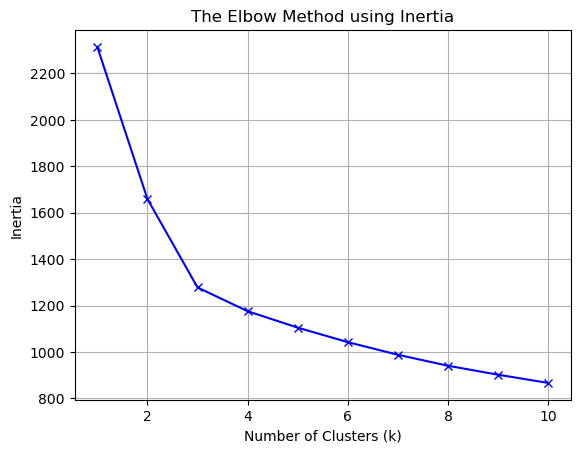

In [51]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'K = {key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()


Using the Elbow method, we identify the point where the reduction in inertia changes abruptly—that is, it decreases significantly at first but then slows down and becomes more gradual. In the graph above, we can see that from k = 1 to k = 3, inertia decreases sharply and quickly. However, from k = 4 onwards, the rate of decrease slows down and becomes more gradual. This indicates that choosing the number of clusters beyond the elbow point results in relatively similar outcomes with no major differences. However, selecting too many clusters can increase the computational cost and time unnecessarily.

Thus, choosing the number of clusters as k = 3 at the elbow point is reasonable in this case.

##### **Using the optimal k, visualize the resulting clusters on three dimensions using `PCA`. [2]**

In [55]:
# Importing PCA
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

cluster_labels = kmeanModels[2].predict(X)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X)

# Convert PCA data to a DataFrame for Plotly
pca_df = pd.DataFrame(data_pca, columns=["PC1", "PC2", "PC3"])
pca_df['Cluster'] = cluster_labels

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    pca_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Cluster",
    title="Clusters Visualized in 3D (PCA)",
    labels={"Cluster": "Cluster"},
    color_continuous_scale="Viridis"  # Choose a color scheme
)

# Hiển thị biểu đồ
fig.show()

#### **2.2. Hierarchical Method: Agglomerative Clustering**

##### **Perform clustering using `Agglomerative Clustering` and experiment with different linkage (ward, average, complete, single). Visualize the resulting clusters for each linkage method and provide your insights based on the observed outcomes. [4]**

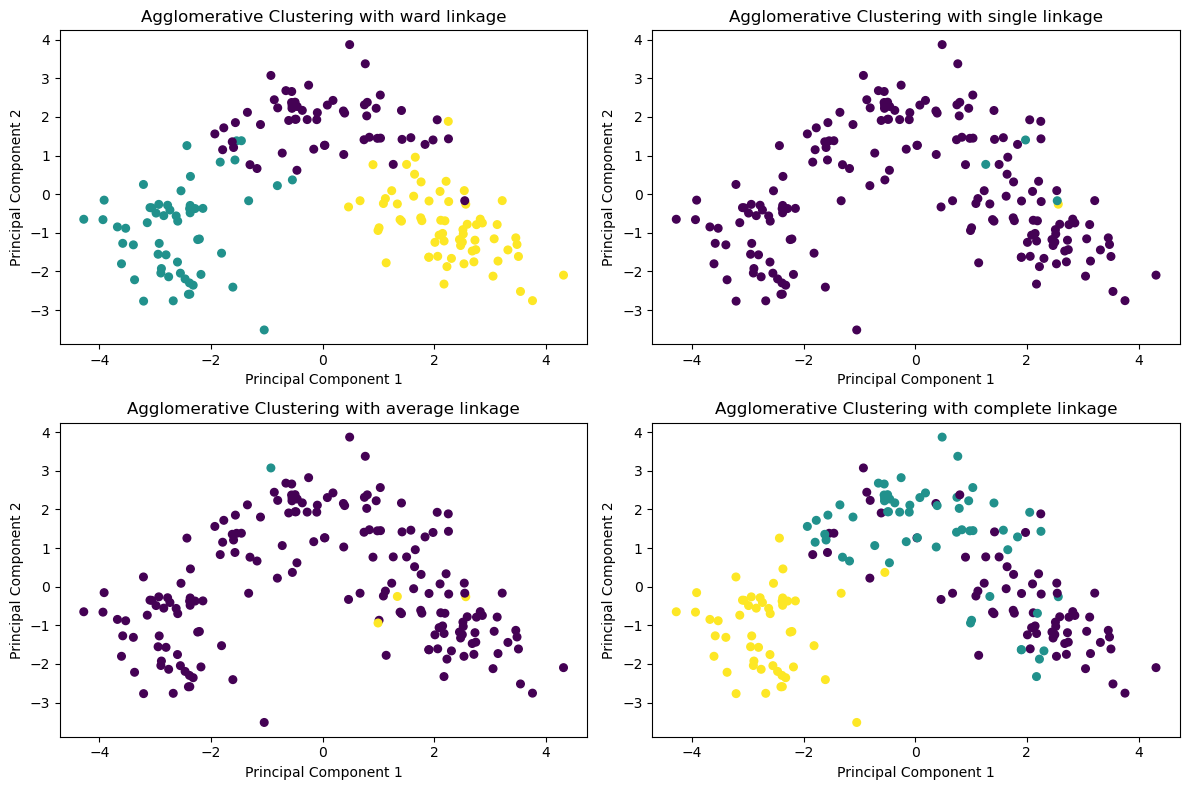

In [56]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'single', 'average', 'complete']
clusters = []
models = []

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, linkage in enumerate(linkages):
    # Perform Agglomerative Clustering
    clustering = AgglomerativeClustering(linkage=linkage, compute_distances=True, n_clusters=3)  # Set n_clusters explicitly
    labels = clustering.fit_predict(X)
    clusters.append(labels)
    models.append(clustering)
    
    # Apply PCA to reduce data to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the clusters
    ax = axes[i]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
    ax.set_title(f'Agglomerative Clustering with {linkage} linkage')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Based on the four plots showing different agglomerative clustering methods, I can provide the following insights:

**1. Agglomerative Clustering with `Ward Linkage`:**

- This method produces the most compact and well-separated clusters, with a clear distinction between the groups.
- The clusters have a more spherical shape, indicating the method is effective at identifying homogeneous, compact groups.


**2. Agglomerative Clustering with `Single Linkage`:**

- This method generates elongated, chain-like clusters with less defined boundaries.
- The clusters have a more irregular shape, suggesting the method is better suited for identifying non-spherical or complex cluster structures.

**3. Agglomerative Clustering with `Average Linkage`:**

- The clusters formed by this method have an intermediate level of compactness and separation compared to Ward and Single Linkage.
- The clusters exhibit a balance between spherical and non-spherical shapes, making this method a good compromise between the two extremes.


**4. Agglomerative Clustering with `Complete Linkage`:**

- This method generates clusters that are similar to the Ward Linkage method, with tight, well-separated groups.
- The clusters have a more spherical shape, indicating the method is effective at identifying compact, homogeneous groups.
- However, the clusters are not as tightly packed as the Ward Linkage method, suggesting it may be slightly less effective at identifying the most compact clusters.

##### **Create a `dendrogram` to visualize the clustering hierarchy using any linkage method. Discuss the insights and information that can be derived from the `dendrogram`. [3]**

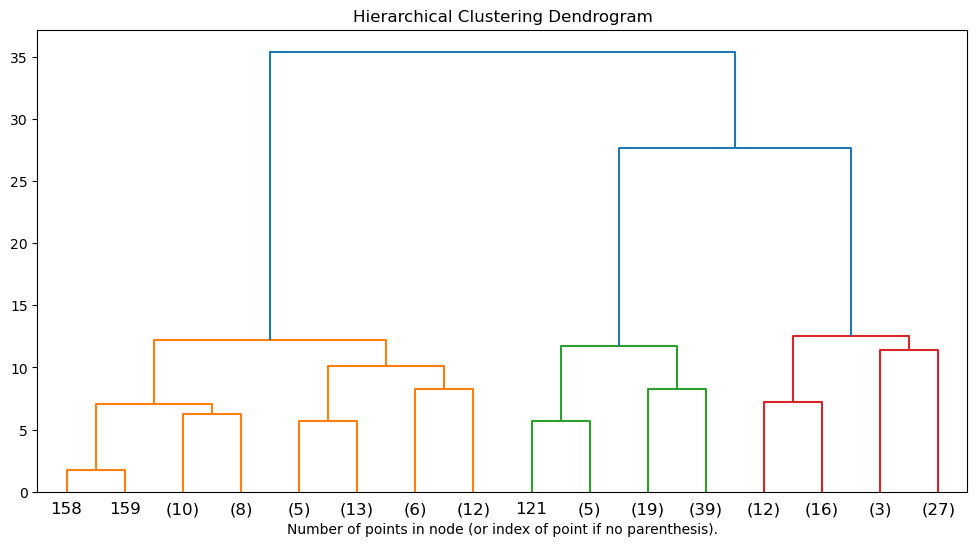

In [57]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(models[0], truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**1. Cluster Formation:**
- In the dendrogram, the initial data points are grouped starting from individual leaves at the bottom.
- As we move upward, clusters are progressively merged at different levels, reflecting the similarity between data points.

**2. Number of Clusters:**
- From the dendrogram, we observe three main branches (orange, green, and red) forming at lower height levels.
- A significant increase in height occurs when these branches merge at around 35. This indicates that cutting the dendrogram below this height results in an optimal number of 3 clusters.
- This choice is reasonable as it retains clear distinctions between clusters while avoiding the merging of very dissimilar clusters.

**3. Cluster Similarity:**
- The orange cluster (on the left) is formed at a lower height, indicating a higher degree of similarity among its data points.
- The green cluster (in the middle) and the red cluster (on the right) also show reasonable similarity but are merged at greater heights compared to the orange cluster, suggesting slightly less homogeneity.

**4. Outliers:**
- There are no distinct branches that are entirely separate or merged at significantly higher levels compared to the rest, indicating no clear outliers in the dataset.

**5. Cluster Composition and Homogeneity:**
- The compact branches in the orange cluster suggest higher homogeneity among its data points.
- In contrast, the red and green clusters are slightly more dispersed, particularly when compared to the orange cluster.

**6. Optimal Distance Threshold:**
- By selecting a distance threshold of around 35, the dendrogram produces 3 main clusters with clear structure.
- Cutting the dendrogram at a lower threshold (e.g., 10–15) would result in a larger number of smaller clusters, which might unnecessarily fragment the data and reduce the practical significance of the clustering.
---
##### **Conclusion:**
- Based on the dendrogram, the optimal number of clusters for this dataset is 3, as represented by the three major branches (orange, green, and red). This clustering choice ensures clear separation while avoiding excessive fragmentation into smaller, less meaningful clusters.








#### **2.3. Density-Based: DBSCAN [5]**

C:\Users\ACER\AppData\Local\Temp\ipykernel_22120\350069520.py:38: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

C:\Users\ACER\AppData\Local\Temp\ipykernel_22120\350069520.py:38: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

C:\Users\ACER\AppData\Local\Temp\ipykernel_22120\350069520.py:38: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence

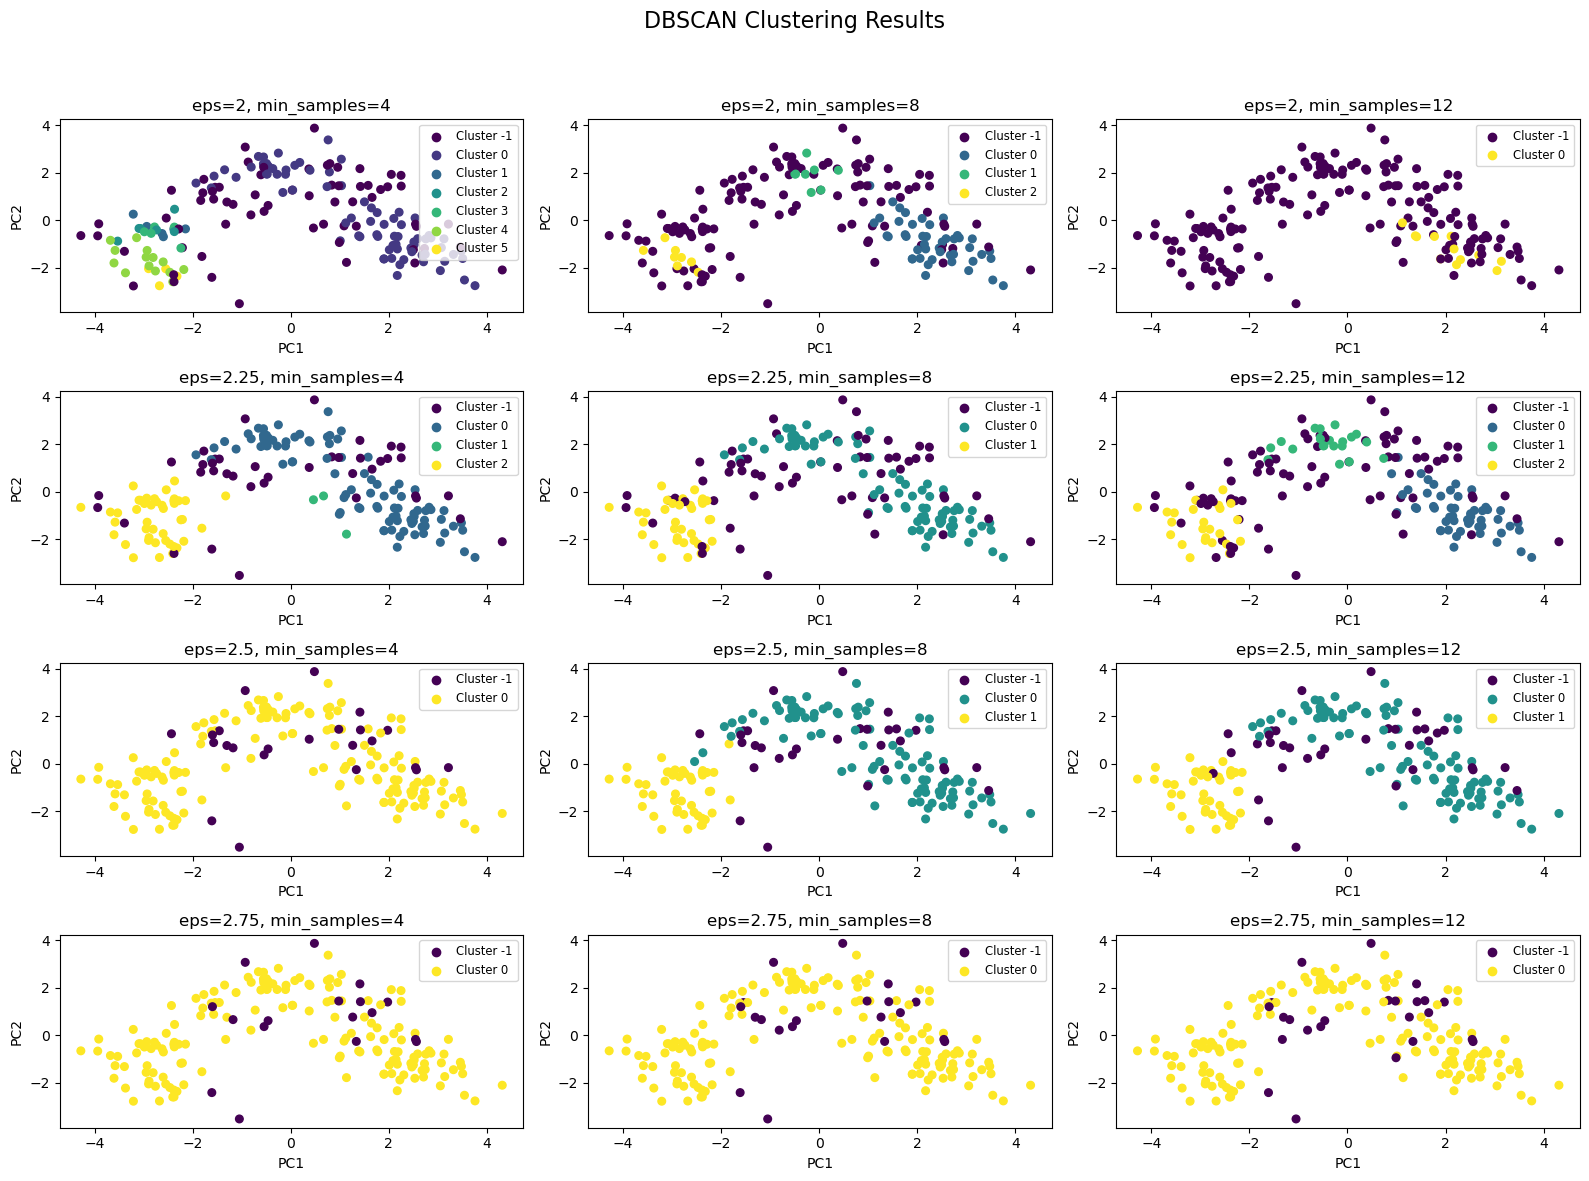

In [44]:
from sklearn.cluster import DBSCAN

DBSCAN(eps=0.5,
 min_samples=5, 
 metric='euclidean', 
 algorithm='auto'
)

# Define parameter grid
eps_values = [2, 2.25, 2.5, 2.75]
min_samples_values = [4, 8, 12]

# Create a PCA instance to reduce data to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Set up the plot grid
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(16, 12))
fig.suptitle("DBSCAN Clustering Results", fontsize=16)

# Loop through all combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Fit DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(X)

        # Plot results
        ax = axes[i, j]
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

        # Add legend
        unique_labels = np.unique(labels)
        for label in unique_labels:
            ax.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')
        ax.legend(loc='best', fontsize='small')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##### **How does the change in `eps` and `min_samples` affect the density necessary to form a cluster?**

Here are some definitions that we need to understand:

- `eps`: This refers to the radius of a cluster (the neighborhood of a core point).
- `min_samples`: This is the minimum number of points (excluding the point itself) required in the neighborhood for a point to be considered a core point.

##### **Analysis of `eps` and `min_samples` in DBSCAN:**

**1. When `eps` is small and `min_samples` is small:**
- A point can easily become a core point, leading to the formation of more clusters. This makes it easier to identify outliers accurately. However, if `eps` is too small, the clustering process might not work optimally.

**2. When `eps` is small and `min_samples` is large:**
- It becomes difficult for a point to become a core point as the density in a region must be very high to satisfy the criteria. This results in fewer clusters and a significant number of outliers. For instance, in the cases with `eps` = 2 and `min_samples` = 12, or `eps` = 2 and `min_samples` = 8, very few points are clustered while most are classified as outliers. When `eps` is too small and `min_samples` is large, DBSCAN may not cluster the data effectively and instead classify most of the data as outliers, wasting the data.

**3. When `eps` is too large:**
- The neighborhood radius expands, which causes more points to be grouped into the same cluster. This reduces the number of clusters, and it may result in almost all data points belonging to a single cluster, with a few outliers. For example, with `eps` = 2.75, regardless of the `min_samples`, the algorithm produces a single cluster (points in yellow in the chart), while the rest are classified as outliers (points in purple). Similarly, with `eps` = 2.5 and `min_samples` = 4, a similar result is observed, where the cluster's neighborhood is large, and the density requirement is low, allowing many points to easily become core points and expanding the cluster over the entire dataset.

**Choosing `eps` and ``min_samples``:**

To achieve optimal clustering, the values of `eps` and `min_samples` should be carefully selected.

- `eps`: Should neither be too large nor too small.
- `min_samples`: Should also be balanced appropriately.

In this case:

- With `eps` = 2.25, the clustering result appears to be good. The algorithm successfully clusters the entire dataset while identifying outliers, with the number of outliers being relatively low.
- Additionally, with `eps` = 2.5 and `min_samples` = 8 or 12, the results are also reasonably good for this dataset.


### **References**

[1] : "Elbow Method for optimal value of k in KMeans" https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

[2] : "3D Scatter Plots in Python" https://plotly.com/python/3d-scatter-plots/

[3] : "Plot Hierarchical Clustering Dendrogram" https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

[4] : "AgglomerativeClustering" https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html

[5] : "DBSCAN" https://phamdinhkhanh.github.io/deepai-book/ch_ml/DBSCAN.html#cac-buoc-trong-thuat-toan-dbscan